# Find some relationship between Brazil cases with weather 

In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('seaborn-whitegrid')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

## 1 Weather

In [2]:
weather = pd.read_csv('../weatherdataset.csv')

# Convert our report_date columns to datetime datatype
weather['date_time'] = pd.to_datetime(weather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date_time']).year
weather['month'] = pd.DatetimeIndex(weather['date_time']).month

# Argentina
brazil_weather = weather[weather['location'] == 'Brazil']
brazil_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
458,2016-02-13,26,19,0.0,11.6,5,34,10:52 AM,10:54 PM,06:07 AM,06:45 PM,20,23,23,22,8,39,88,20.9,1012,26,9,292,5,Brazil,2016,2
459,2016-02-14,26,18,0.0,11.6,5,42,11:50 AM,11:44 PM,06:07 AM,06:44 PM,20,23,23,22,10,30,87,22.2,1012,26,8,311,7,Brazil,2016,2
460,2016-02-15,26,18,0.0,11.6,5,49,12:48 PM,No moonset,06:07 AM,06:44 PM,19,23,23,22,15,32,85,8.4,1013,26,8,191,10,Brazil,2016,2
461,2016-02-16,27,18,0.0,11.6,5,57,01:46 PM,12:36 AM,06:08 AM,06:43 PM,18,23,23,22,11,18,81,2.4,1014,27,10,45,7,Brazil,2016,2
462,2016-02-17,29,18,0.0,11.6,5,64,02:41 PM,01:29 AM,06:08 AM,06:43 PM,19,24,24,23,12,15,79,0.8,1013,29,9,63,8,Brazil,2016,2


In [3]:
brazil_weather = brazil_weather[['date_time','maxtempC','precipMM','humidity']]
brazil_weather.head()

,date_time,maxtempC,precipMM,humidity
458,2016-02-13,26,20.9,88
459,2016-02-14,26,22.2,87
460,2016-02-15,26,8.4,85
461,2016-02-16,27,2.4,81
462,2016-02-17,29,0.8,79


## 2 Zika virus

In [4]:
zika = pd.read_csv('../zikavirus_dataset.csv')
zika.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [5]:
zika = zika.dropna(how = 'all')
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)
zika['cases'] = zika['cases'].astype(float)
zika['cases'] = zika['cases'].fillna(0)
zika['cases'] = zika['cases'].astype(int)
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

In [6]:
zika.head()

,report_date,location,location_type,data_field,cases,year,month
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1,2017.0,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2,2017.0,1.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2,2017.0,1.0


## 1.1 Brazil

In [7]:
brazil_zika = zika[zika["location"].str.startswith("Brazil")]
brazil_zika.head()

,report_date,location,location_type,data_field,cases,year,month
5788,2016-02-13,Brazil-Acre,state,microcephaly_under_investigation,22,2016.0,2.0
5789,2016-02-13,Brazil-Alagoas,state,microcephaly_under_investigation,90,2016.0,2.0
5790,2016-02-13,Brazil-Amapa,state,microcephaly_under_investigation,0,2016.0,2.0
5791,2016-02-13,Brazil-Amazonas,state,microcephaly_under_investigation,0,2016.0,2.0
5792,2016-02-13,Brazil-Bahia,state,microcephaly_under_investigation,583,2016.0,2.0


In [8]:
BrazilCases = brazil_zika.loc[(brazil_zika['data_field'] == 'zika_reported') & (brazil_zika['location_type'] == 'state')]
BrazilCases = BrazilCases.sort_values(by=['report_date'])
BrazilCases.head()

,report_date,location,location_type,data_field,cases,year,month
14106,2016-04-02,Brazil-Rondonia,state,zika_reported,618,2016.0,4.0
14136,2016-04-02,Brazil-Distrito_Federal,state,zika_reported,233,2016.0,4.0
14135,2016-04-02,Brazil-Goias,state,zika_reported,920,2016.0,4.0
14134,2016-04-02,Brazil-Mato_Grosso,state,zika_reported,16055,2016.0,4.0
14133,2016-04-02,Brazil-Mato_Grosso_do_Sul,state,zika_reported,296,2016.0,4.0


In [9]:
brazil = BrazilCases.groupby(['report_date']).cases.agg([sum])
brazil = brazil.reset_index()
brazil = brazil.rename(columns={"report_date": "date_time"})
brazil.head()

,date_time,sum
0,2016-04-02,91387
1,2016-04-23,120161
2,2016-04-30,127822
3,2016-05-07,138108
4,2016-05-14,138108


In [10]:
weather_case = pd.merge(brazil,brazil_weather, on=['date_time'], how='left') 
weather_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2016-04-02,91387,28,8.3,78
1,2016-04-23,120161,27,0.0,64
2,2016-04-30,127822,26,3.3,85
3,2016-05-07,138108,27,0.0,69
4,2016-05-14,138108,26,15.3,83


Text(0.5, 1.0, 'Humidity')

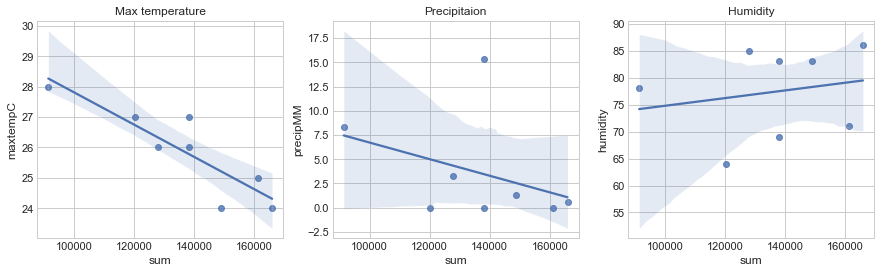

In [11]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=weather_case['maxtempC'], x=weather_case['sum'])
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=weather_case['precipMM'], x=weather_case['sum'])
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=weather_case['humidity'], x=weather_case['sum'])
axes[2].set_title('Humidity')

<AxesSubplot:>

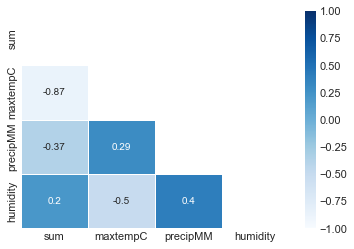

In [15]:
matrix = np.triu(weather_case.corr())
sns.heatmap(weather_case.corr(),annot=True,vmax=1,vmin=-1, mask=matrix, linewidths=.5 , cmap='Blues')
# sns.heatmap(weather_case_panama.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, linewidths=.5) 
# sns.heatmap(weather_case.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1) 